In [4]:
!ls

'Digit Recogniser Kaggle.ipynb'  'Submission 1.csv'   train.csv
 sample_submission.csv		  test.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]


In [9]:
train_data = pd.read_csv("train.csv")
val_data = pd.read_csv("test.csv")

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Visualising some images

In [11]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X = train_data.drop('label', axis=1)
y = train_data["label"]

In [24]:
X = np.reshape(np.array(X),(-1,28,28,1))
val_data = np.reshape(np.array(val_data),(-1,28,28,1))

In [16]:
X.shape

(42000, 28, 28, 1)


The classified image is 6


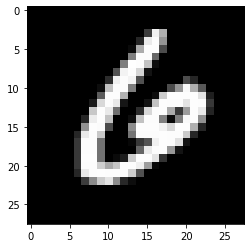

In [17]:
def plot_random():
    choice = np.random.randint(0,X.shape[0])  
    print( "\nThe classified image is " + str(y[choice]))
    plt.imshow(X[choice,:,:,0],cmap='gray')
plot_random()

In [18]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses, optimizers
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Model = Sequential()
Model.add(Conv2D(28,(3,3), padding = "valid",activation='relu',input_shape = (28,28,1)))
Model.add(MaxPool2D())
Model.add(BatchNormalization())
Model.add(Conv2D(28,(3,3), padding = "valid",activation='relu',input_shape = (28,28,1)))
Model.add(MaxPool2D())
Model.add(BatchNormalization())
Model.add(Conv2D(14,(3,3), padding = "same" ,activation='relu'))
Model.add(MaxPool2D())
Model.add(Flatten())
Model.add(Dense(32,activation="relu"))
Model.add(Dropout(0.2))
Model.add(Dense(10,activation="softmax"))

Model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])

idg = ImageDataGenerator(rotation_range=10, zoom_range =0.1, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1)      
          

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
BS=32; EPOCHS = 100; i = 0
y_cat = to_categorical(y)

In [26]:
y_cat.shape
val_data = val_data/255.0

(31500, 28, 28, 1) (10500, 28, 28, 1) (31500, 10) (10500, 10)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100


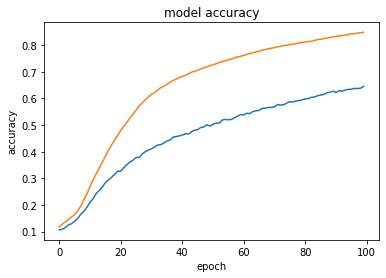

In [30]:

trainX, testX, trainY, testY = train_test_split(X,y_cat,test_size = 0.25)

trainX, testX  = trainX/255.0 , testX/255.0


#X[train]/255.0, X[test]/255.0, y_cat[train],y_cat[test]
#     print(trainX.shape, trainY.shape)
#     print(np.array(idg.flow(trainX, trainY, batch_size=BS)))

print(trainX.shape,testX.shape, trainY.shape, testY.shape)
#    history = Model.fit(trainX, trainY)#, 
#                             validation_data=(testX, testY), epochs=EPOCHS)
history = Model.fit_generator(idg.flow(trainX, trainY, batch_size=BS),
                        validation_data=(testX, testY), steps_per_epoch=trainX.shape[0] // BS
                              , epochs=EPOCHS, verbose=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [31]:
predY = np.argmax(Model.predict(testX), axis = -1)
predy = np.argmax(testY, axis = -1)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(predY,predy)

array([[ 991,    0,    2,    1,   10,   16,   18,    5,   32,   21],
       [   0, 1126,    4,    0,    1,   11,    2,    7,    2,    2],
       [   0,    4,  649,   22,    0,    5,    0,   31,   15,    3],
       [   1,   10,  234, 1032,    0,  101,    1,   65,   29,   24],
       [   1,    1,   16,    1,  913,   14,    4,   33,   10,   85],
       [   7,    0,   31,   11,    1,  715,    1,    4,   29,   20],
       [  21,    2,   17,    3,   67,   49,  975,    1,   39,   25],
       [   0,   15,   34,    8,    7,    2,    0,  882,    4,   14],
       [  11,   15,   75,    9,    5,   52,   31,    7,  813,   30],
       [   1,    3,    0,    0,   23,    5,    0,   40,   26,  815]])

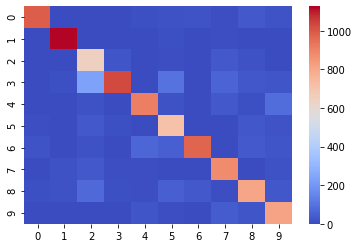

In [34]:
sns.heatmap(confusion_matrix(predY,predy), cmap='coolwarm')

In [35]:
predval = np.argmax(Model.predict(val_data.reshape(-1,28,28,1)), axis = -1)

In [36]:
predval = pd.DataFrame(predval, columns=["Label"])

In [37]:
predval["ImageId"] = range(1,len(predval)+1)

In [38]:
!head Submission\ 1.csv

ImageId,Label
1,2
2,0
3,8
4,4
5,3
6,7
7,0
8,3
9,0


In [39]:
predval[["ImageId","Label"]].to_csv("Submission 2.csv", index=False)